## Importing packages

In [39]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns

## Loading the data

In [3]:
(X_train, y_train), ( X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

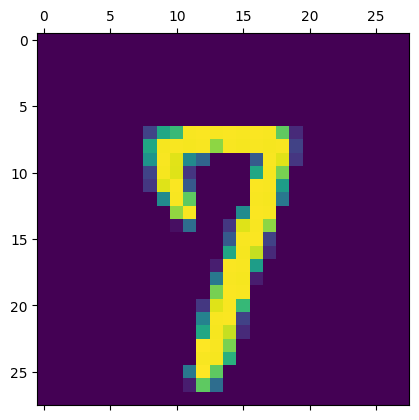

In [5]:
plt.matshow(X_train[888])

In [6]:
len(X_train)

60000

### Normalizing the data

In [11]:
X_train  = X_train / 255
X_test = X_test / 255

In [13]:
# reshaping the data
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Creating the model

In [15]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

/home/josedembo/Documents/repositors/deepLearning/.deep_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8226 - loss: 0.7018
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9115 - loss: 0.3110
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9214 - loss: 0.2798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9254 - loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9258 - loss: 0.2618


### Avalueting the accuracy on test dataset

In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9163 - loss: 0.3016


[0.2665154039859772, 0.9276000261306763]

In [17]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
X_test_flattened.shape

(10000, 784)

In [24]:
X_test_flattened[0].shape

(784,)

In [26]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


In [31]:
y_predicted[0] * 255

array([5.5634499e+00, 9.1220136e-05, 1.8207590e+01, 2.4632076e+02,
       6.7971325e-01, 3.1113335e+01, 4.6155031e-04, 2.5496271e+02,
       4.0736717e+01, 1.7930634e+02], dtype=float32)

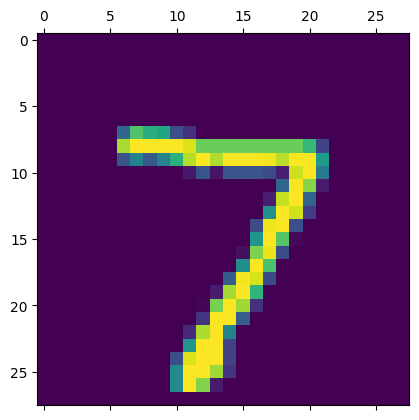

In [29]:
plt.matshow(X_test[0])

In [32]:
np.argmax(y_predicted[0] * 255)

np.int64(7)

### Ploting confusion matrix - y_true vs y_predicted

In [33]:
y_predicted_labes = [np.argmax(value) for value in y_predicted]
y_predicted_labes

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [38]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    6,    3,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  922,   18,    7,    5,   11,   11,   44,    2],
       [   1,    0,   17,  929,    0,   19,    2,   11,   24,    7],
       [   1,    1,    5,    2,  911,    0,    9,    4,   10,   39],
       [   9,    3,    3,   35,    7,  784,    8,    6,   32,    5],
       [   8,    3,    7,    1,    7,   17,  911,    2,    2,    0],
       [   1,    5,   22,    6,    6,    0,    0,  957,    4,   27],
       [   6,    8,    5,   19,    9,   25,    9,   11,  876,    6],
       [   9,    7,    2,   11,   21,    6,    0,   27,   11,  915]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

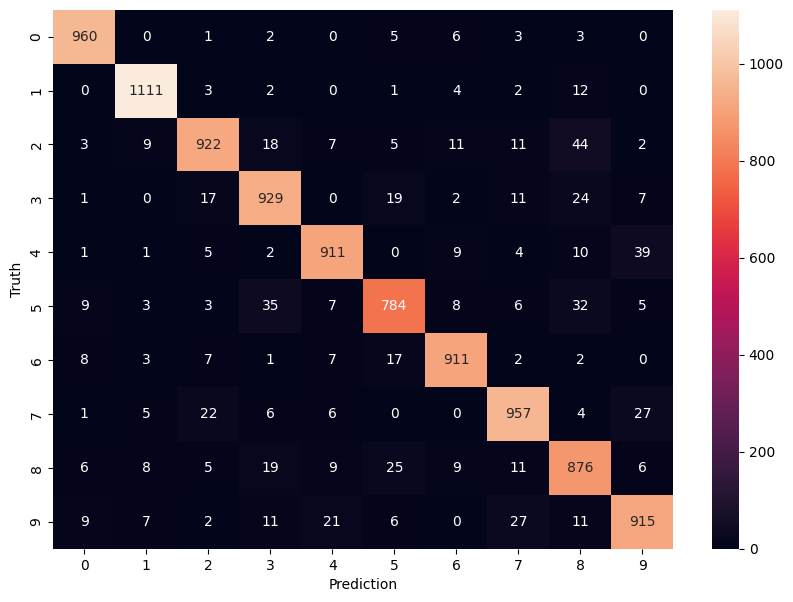

In [40]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel("Truth")

## Criating secund model with onde Hidden Layer

In [42]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape=(784,), activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8709 - loss: 0.4632
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9598 - loss: 0.1379
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9735 - loss: 0.0887
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9798 - loss: 0.0659
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0504


In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1024


[0.08886825293302536, 0.9742000102996826]

In [45]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
y_predicted_labels = [np.argmax(array_values) for array_values in y_predicted]
y_predicted_labels

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(6),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [47]:
cm  = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

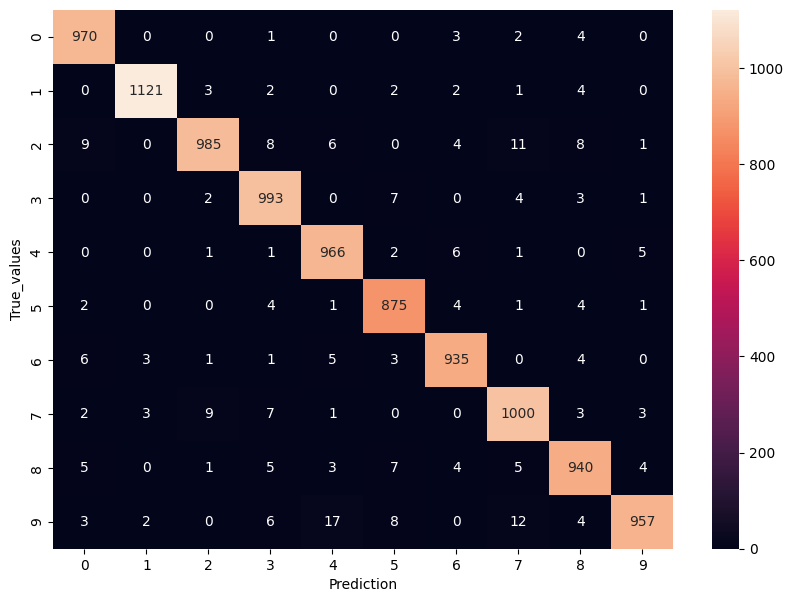

In [49]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("True_values")
plt.show()

## Training a model withoud necessity of Flatten the input data

In [56]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)), # This layer avoid as the necessety to flatten our dataset
        keras.layers.Dense(100, activation="softmax"),
        keras.layers.Dense(80, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7605 - loss: 0.8906
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9343 - loss: 0.2356
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9454 - loss: 0.1962
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9499 - loss: 0.1813
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9547 - loss: 0.1639


In [57]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9438 - loss: 0.2033


[0.17736154794692993, 0.9520999789237976]

In [59]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)), # This layer avoid as the necessety to flatten our dataset
        keras.layers.Dense(100, activation="softmax"),
        keras.layers.Dense(80, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", "sparse_categorical_accuracy"]
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7750 - loss: 0.8606 - sparse_categorical_accuracy: 0.7750
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9414 - loss: 0.2091 - sparse_categorical_accuracy: 0.9414
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9504 - loss: 0.1794 - sparse_categorical_accuracy: 0.9504
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9541 - loss: 0.1633 - sparse_categorical_accuracy: 0.9541
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9577 - loss: 0.1495 - sparse_categorical_accuracy: 0.9577


In [61]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9440 - loss: 0.2004 - sparse_categorical_accuracy: 0.9440


[0.18479160964488983, 0.9483000040054321, 0.9483000040054321]